In [1]:
import pandas as pd
import torch
import numpy as np
import os
import random

In [2]:
device = torch.device('cuda') # torch.device('cpu')
device

device(type='cuda')

In [4]:
torch.cuda.set_device(0)
device = torch.device("cuda")

def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

set_all_seeds(42)

In [91]:
train_data = pd.read_csv("train_data.csv")
train_data.head(10)
train_data['rating'].unique()

array([4, 3, 2, 1, 0], dtype=int64)

array([[<AxesSubplot: title={'center': 'rating'}>]], dtype=object)

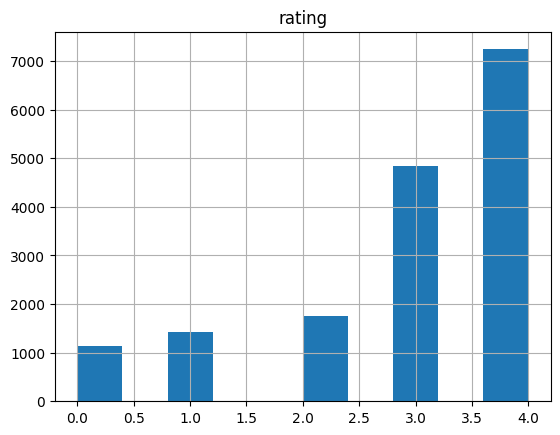

In [92]:
train_data.hist(column="rating")

In [7]:
test_data = pd.read_csv("test_data.csv")
test_data.head(20)

,"great hotel location stayed 4 nts 24th 28th jan celebrating daughter 21st birthday.staff helpful getting balloons cake ordered occassion gave daughter chocolates vouchers free drink cellar bar.they recommended phillepe chow celebration meal lovely pricey special occasion booking recommended busy friday night.hotel rooms appointed turn service night molton brown products bathroom huge windows bathroom bit draughty needed towel having bath.we 18th 22nd floors no trouble noise traffic nightclub.location good minutes walk times square main shopping areas.got good deli right corner hotel called pax good downside hotel no tea/coffee facilities rooms available hotel room service expensive just tea coffee 20,"
0,"n't return overall disappointed hotel, no hot ..."
1,great value location desired problem hotel loc...
2,kind helpfull people people kind helpful.we no...
3,absolutely fabulous melia comfortable star hot...
4,"trip hell thoughts gotten, trip airport van no..."
5,lost madrid wife 10 month old recently stayed ...
6,exceptional value money thoroughly recommend h...
7,no breakfast just returned home san francisco ...
8,"great place friend stayed end april 5 nights, ..."
9,pleasant change hotels new orleans suite great...


In [8]:
train_data.shape[0]

16392

In [9]:
import re
import nltk
from tqdm.auto import tqdm
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in tqdm(range(0, train_data.shape[0])):
    review = re.sub("[^a-zA-z]", ' ', train_data["review"][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  0%|          | 0/16392 [00:00<?, ?it/s]

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = train_data["rating"].values

In [15]:
X.shape

(16392, 2500)

In [16]:
y.shape

(16392,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Making predictions using AdaBoostClassifier

In [97]:
from sklearn.ensemble import AdaBoostClassifier
lr = AdaBoostClassifier()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.63      0.58       215
           1       0.39      0.29      0.33       301
           2       0.40      0.17      0.24       348
           3       0.47      0.46      0.46       961
           4       0.66      0.78      0.71      1454

    accuracy                           0.56      3279
   macro avg       0.49      0.46      0.46      3279
weighted avg       0.54      0.56      0.55      3279



In [20]:
test_data = pd.read_csv("test_data.csv", header=None)
test_data.head(20)

,0
0,great hotel location stayed 4 nts 24th 28th ja...
1,"n't return overall disappointed hotel, no hot ..."
2,great value location desired problem hotel loc...
3,kind helpfull people people kind helpful.we no...
4,absolutely fabulous melia comfortable star hot...
5,"trip hell thoughts gotten, trip airport van no..."
6,lost madrid wife 10 month old recently stayed ...
7,exceptional value money thoroughly recommend h...
8,no breakfast just returned home san francisco ...
9,"great place friend stayed end april 5 nights, ..."


In [21]:
list(test_data.columns.values)

[0]

In [22]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in tqdm(range(0, test_data.shape[0])):
    review = re.sub("[^a-zA-z]", ' ', test_data[0][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = " ".join(review)
    corpus.append(review)


  0%|          | 0/4099 [00:00<?, ?it/s]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()

In [24]:
X.shape

(4099, 2500)

# Make Prediction for test_data

In [86]:
test_pred = lr.predict(X)
test_pred

array([0, 4, 0, ..., 4, 0, 0], dtype=int64)

## export predictions to .csv file

In [82]:
test_pred = test_pred.tolist()

In [83]:
df = pd.DataFrame({"0":test_pred})

In [90]:
df['0'].unique()

array([0, 4, 3, 1, 2], dtype=int64)

In [85]:
df.to_csv('predictions.csv', header=None, index=None)